# Load and explore CIFAR-10 dataset

In [20]:
#!pip install tensorflow
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models

In [12]:
import tensorflow as tf

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# CIFAR-10 labels
cifar10_labels = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]

# Example usage
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", x_test.shape)
print("Test labels shape:", y_test.shape)

# Convert labels to class names
y_train_labels = [cifar10_labels[int(label)] for label in y_train.ravel()]
y_test_labels = [cifar10_labels[int(label)] for label in y_test.ravel()]

# If you really want to use Pandas, you can convert to DataFrame
import pandas as pd

train_df = pd.DataFrame({'Image': x_train.tolist(), 'Label': y_train_labels})
test_df = pd.DataFrame({'Image': x_test.tolist(), 'Label': y_test_labels})

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


In [13]:
train_df.head()

,Image,Label
0,"[[[0.23137254901960785, 0.24313725490196078, 0...",frog
1,"[[[0.6039215686274509, 0.6941176470588235, 0.7...",truck
2,"[[[1.0, 1.0, 1.0], [0.9921568627450981, 0.9921...",truck
3,"[[[0.10980392156862745, 0.09803921568627451, 0...",deer
4,"[[[0.6666666666666666, 0.7058823529411765, 0.7...",automobile


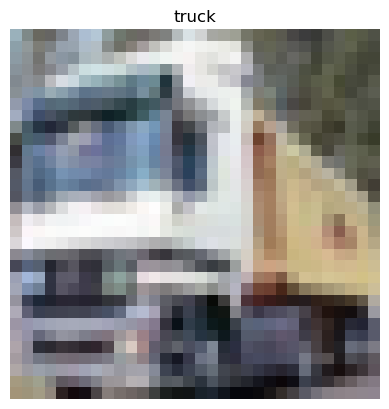

In [18]:
# Display an image from the dataset
index = 1  # Change this index to display different images
#display(x_train[index])
plt.imshow(x_train[index])
plt.axis('off')  # Turn off axis
plt.title(cifar10_labels[int(y_train[index][0])])  # Extract scalar value
plt.show()

# Train the model

In [21]:
# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)  # 10 classes for CIFAR-10
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("Test accuracy:", test_acc)

C:\Users\bryar\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3448 - loss: 1.7805 - val_accuracy: 0.5379 - val_loss: 1.2842
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5673 - loss: 1.2158 - val_accuracy: 0.5810 - val_loss: 1.1888
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6379 - loss: 1.0259 - val_accuracy: 0.6533 - val_loss: 0.9833
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6816 - loss: 0.9103 - val_accuracy: 0.6616 - val_loss: 0.9583
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7008 - loss: 0.8402 - val_accuracy: 0.6802 - val_loss: 0.9077
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7240 - loss: 0.7832 - val_accuracy: 0.6812 - val_loss: 0.8955
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7425 - loss: 0.7326 - val_accuracy: 0.6858 - val_loss: 0.9129
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7583 - loss: 0.6875 - 